In [212]:
#!pip install basemap-data
#!pip install basemap-data

# INTRODUCTION 

In 2004 Lufthansa airlines had the first commercial flight to use in-flight broadband internet access, where the aircraft went from Munich to Los Angeles with the Boeing service Connexion. Following the excitement, many airlines began to offer it, with some still trying to implement it. With the increase in demand, it is unlikely the resources will be enough to meet those demands, therefore a need to for the technology to be optimized (Sakhaee and Jamalipour 2006). 

Aircrafts move at high speeds, and integrating terrestrial communication solutions into aeronautical systems can be challenging.  There are two broad classes of connectivity solutions : the Satellite to Aircraft communication (S2AC) , and the Direct Aircraft to Ground Communication (DA2GC).  The connections are mostly dependent on satellites, especially the Geostationary Earth Orbit (GEO) satellite, utilizing near-global coverage, with it having a longer-lasting connection than DA2GC and aircraft–aircraft communication (A2AC) without needing GEO satellite handovers. GEO satellites have a one-way propagation delay of 120 milliseconds from ground to satellite since they’re about 35,000 km away from the ground. The Medium and Low earth orbit (MEO/LEO) satellites have lower latency in comparison to the GEO satellites because they’re closer to the earth, the LEO satellites offer the lowest latency at 300km with a propagation delay of 1 ms.  Unfortunately those LEO satellites have limited mobility and coverage (Cui et al. 2021).

To receive the connections, there are three main ways: (1) ATG (air-to-ground) uses two antennas are placed on the plane’s belly, where signals from the land towers will be picked up. This method is common in domestic travel in terrestrial regions. With an approximate speed of 3 Mbps, it is sufficient for reading emails and going through social media. (2) Ku-band: With this satellite based service, connections can be made over the ocean and out of range of cell towers. A large saucer shaped antenna is put on the plane and directed to the transmitting satellite when airborne, reaching speeds up to 40 Mbps. (3) Ka-band : Used mostly in the military, it offers some of the fastest Wifi  services available with speeds getting to 70Mbps. 

With the high need for internet connection, it is essential that the facilities and methods used in providing the service are optimized. In this exercise, we will be performing routing optimisation for aeronautical networks. We will consider a set of planes flying over the North-Atlantic as shown in the figure below. The airplanes will find an optimal data packet routing path to the Ground Station (GS) in terms of one or two objectives to be optimised. Flight AA101 will be used as a main case in the exercises.

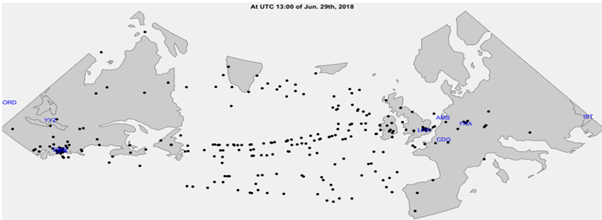

Below, we see the positions of the groundstation 

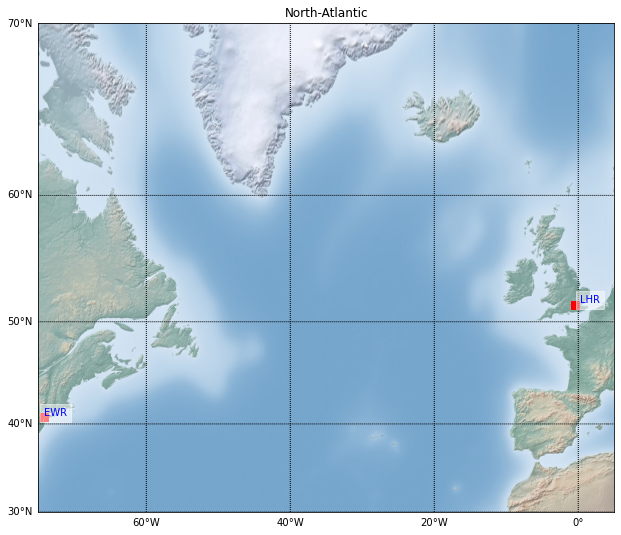

In [213]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
m = Basemap(projection='merc', # Mercator Projection
            llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon)
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
m.shadedrelief(scale=0.5)
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)


# Set airport locations
LHR = [51.47, -0.45, 24.91]   # (Latitude, Longitude, Altitude)
EWR = [40.69, -74.17, 2.66]   # (Latitude, Longitude, Altitude)
latitudes = [LHR[0],EWR[0]]
longitudes = [LHR[1],EWR[1]]
altitudes = [LHR[2],EWR[2]]
lats = latitudes
lons = longitudes

# compute n# make up some data for scatter plot
x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 50, marker='s', color='Red') 
text_airport_LHR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_EWR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_LHR.set_position([x[0]*1.01, y[0]*1.01])
text_airport_EWR.set_position([x[1]*1.02, y[1]*1.02])
text_airport_LHR.set_text('LHR')
text_airport_EWR.set_text('EWR')


plt.title("North-Atlantic")
plt.show()

The essence of optimisation is to get the best solution when presented with different conditions of a problem. For the first optimization problem, we are to find the maximum end-to-end data transmission rate from each airplane to either Heathrow (LHR) or Newark (NWR) airport. The table below shows how the distances between the planes are correlated with the transmission rates. Where the maximum distance between any two planes in a routing path will reveal the end to end transmission rate.

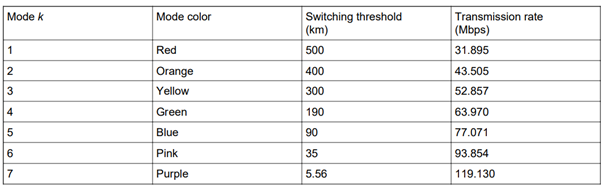



### Data preparation

First, we load our dataset

In [214]:
import pandas as pd
flight_data = pd.read_csv("NA_13_Jun_29_2018_UTC13.csv") # loading csv file containing the plane data
flight_data.head(10)

,Flight No.,Timestamp,Altitude,Latitude,Longitude
0,AA101,1530277200,39000.0,50.9,-38.7
1,AA109,1530277200,33000.0,60.3,-12.2
2,AA111,1530277200,39000.0,52.7,-18.1
3,AA113,1530277200,37000.0,43.0,-11.1
4,AA151,1530277200,36400.0,47.0,-27.7
5,AA198,1530277200,0.0,39.9,-73.0
6,AA199,1530277200,37000.0,53.1,-23.8
7,AA204,1530277200,0.0,40.2,-73.6
8,AA209,1530277200,38000.0,58.2,-59.0
9,AA221,1530277200,34000.0,59.7,-51.8


In [215]:
#adding LHR and EWR co-ordinates to the dataset
london = pd.DataFrame({'Flight No.': 'LHR', 'Timestamp': 1530277200 , 'Altitude':81.73, 'Latitude':51.47,'Longitude':-0.45},index=[216])
newark = pd.DataFrame({'Flight No.': 'EWR', 'Timestamp': 1530277200 , 'Altitude':8.72, 'Latitude':40.69,'Longitude':-74.17},index=[217])
#flight_data.append(london)
flight_data = pd.concat([flight_data,london,newark])
flight_data

,Flight No.,Timestamp,Altitude,Latitude,Longitude
0,AA101,1530277200,39000.00,50.90,-38.70
1,AA109,1530277200,33000.00,60.30,-12.20
2,AA111,1530277200,39000.00,52.70,-18.10
3,AA113,1530277200,37000.00,43.00,-11.10
4,AA151,1530277200,36400.00,47.00,-27.70
...,...,...,...,...,...
213,UA975,1530277200,36000.00,50.50,-26.40
214,UA986,1530277200,36000.00,60.00,-32.20
215,UA988,1530277200,36100.00,52.70,-18.80
216,LHR,1530277200,81.73,51.47,-0.45


In [216]:
LatitudeData = flight_data.Latitude.copy()
LongitudeData = flight_data.Longitude.copy()
AltitudeData = flight_data.Altitude.copy()
#print(LatitudeData)
#print(LongitudeData)
#print(AltitudeData)

Now creating functions to calculate the distance between aircraft 

In [217]:
# Calculating the distance between a pair of aircraft
import math
def calculate_distance(plane_1,plane_2,info = 'distance'):
    """
    Calculating the distance ebetween any two planes
    """
    plane_1_values = flight_data.loc[(flight_data["Flight No."] == plane_1)]
    plane_2_values = flight_data.loc[(flight_data["Flight No."] == plane_2)]
    
    
    R_E = 6371000   # The radius of earth

    L_a = plane_1_values.iloc[0]['Altitude']*0.3048
    L_b = plane_2_values.iloc[0]['Altitude']*0.3048
    #L_a = AltitudeData[0] * 0.3048  # get altitude and convert foot to meter
    #L_b = AltitudeData[1] * 0.3048  # get altitude and convert foot to meter

    Theta_a = plane_1_values.iloc[0]['Latitude']
    Theta_b = plane_2_values.iloc[0]['Latitude']
    
    #Theta_a = LatitudeData[0] # get latitude
    #Theta_b = LatitudeData[1] # get latitude

    Varphi_a = plane_1_values.iloc[0]['Longitude']
    Varphi_b = plane_2_values.iloc[0]['Longitude']
    #Varphi_a = LongitudeData[0] # get longitude
    #Varphi_b = LongitudeData[1] # get longitude

    # The below code is to convert (altitude, latitude, longitude) to 3D Cartesian coordinates
    p_xa = (R_E + L_a) * math.cos(math.radians(Theta_a)) * math.cos(math.radians(Varphi_a))  # Eq. (15)
    p_ya = (R_E + L_a) * math.cos(math.radians(Theta_a)) * math.sin(math.radians(Varphi_a))  # Eq. (16)
    p_za = (R_E + L_a) * math.sin(math.radians(Theta_a))  # Eq. (17)

    p_xb = (R_E + L_b) * math.cos(math.radians(Theta_b)) * math.cos(math.radians(Varphi_b))  # Eq. (15)
    p_yb = (R_E + L_b) * math.cos(math.radians(Theta_b)) * math.sin(math.radians(Varphi_b))  # Eq. (16)
    p_zb = (R_E + L_b) * math.sin(math.radians(Theta_b))  # Eq. (17)

    # calculate the distance between aircraft a and aircraft b
    d_ab_in_m = math.sqrt((abs(p_xa - p_xb)) ** 2 + (abs(p_ya - p_yb)) ** 2 + (abs(p_za - p_zb)) ** 2)
    #print(d_ab_in_m)
    d_ab_in_km = d_ab_in_m / 1000
    #print(d_ab_in_km)
    
    plane_1_dict = {'Altitude_1':L_a,'Latitude_1':Theta_a,'Longitude_1':Varphi_a,'flight_no_1':plane_1}
    plane_2_dict = {'Altitude_2':L_b,'Latitude_2':Theta_b,'Longitude_2':Varphi_b,'flight_no_2':plane_2}
    
    if info == 'details':
        return plane_1_dict,plane_2_dict
    if info == 'distance':
        return d_ab_in_km

In [218]:
def GS_distance(plane_1,ground_station = 'LHR'):
    """
    Calculating the distance between a plane and the ground station
    """
    plane_1_values = flight_data.loc[(flight_data["Flight No."] == plane_1)]
    
    LHR= [51.47, -0.45, 24.91]# (Latitude, Longitude, Altitude)
    EWR= [40.69, -74.17, 2.66]   # (Latitude, Longitude, Altitude)
    
    R_E = 6371000   # The radius of earth

    L_a = plane_1_values.iloc[0]['Altitude']*0.3048
    if ground_station == 'LHR':    
        L_b = LHR[2]*0.3048
        Theta_b = LHR[0]
        Varphi_b = LHR[1]
    if ground_station == 'EWR' :
        L_b = EWR[2]*3048
        Theta_b = EWR[0]
        Varphi_b = EWR[1] 
    #L_a = AltitudeData[0] * 0.3048  # get altitude and convert foot to meter
    #L_b = AltitudeData[1] * 0.3048  # get altitude and convert foot to meter

    Theta_a = plane_1_values.iloc[0]['Latitude']
    #Theta_b = plane_2_values.iloc[0]['Latitude']
    
    #Theta_a = LatitudeData[0] # get latitude
    #Theta_b = LatitudeData[1] # get latitude

    Varphi_a = plane_1_values.iloc[0]['Longitude']
    #Varphi_b = plane_2_values.iloc[0]['Longitude']
    #Varphi_a = LongitudeData[0] # get longitude
    #Varphi_b = LongitudeData[1] # get longitude

    # The below code is to convert (altitude, latitude, longitude) to 3D Cartesian coordinates
    p_xa = (R_E + L_a) * math.cos(math.radians(Theta_a)) * math.cos(math.radians(Varphi_a))  # Eq. (15)
    p_ya = (R_E + L_a) * math.cos(math.radians(Theta_a)) * math.sin(math.radians(Varphi_a))  # Eq. (16)
    p_za = (R_E + L_a) * math.sin(math.radians(Theta_a))  # Eq. (17)

    p_xb = (R_E + L_b) * math.cos(math.radians(Theta_b)) * math.cos(math.radians(Varphi_b))  # Eq. (15)
    p_yb = (R_E + L_b) * math.cos(math.radians(Theta_b)) * math.sin(math.radians(Varphi_b))  # Eq. (16)
    p_zb = (R_E + L_b) * math.sin(math.radians(Theta_b))  # Eq. (17)

    # calculate the distance between aircraft a and aircraft b
    d_ab_in_m = math.sqrt((abs(p_xa - p_xb)) ** 2 + (abs(p_ya - p_yb)) ** 2 + (abs(p_za - p_zb)) ** 2)
    #print(d_ab_in_m)
    d_ab_in_km = d_ab_in_m / 1000
    #print(d_ab_in_km)
    
    plane_1_dict = {'Altitude_1':L_a,'Latitude_1':Theta_a,'Longitude_1':Varphi_a,'flight_no_1':plane_1}
    
    
    return d_ab_in_km

In [219]:
LHR_values = []
EWR_values = []

for planes in flight_data['Flight No.']:
    LHR_values.append(GS_distance(planes,'LHR'))
    EWR_values.append(GS_distance(planes,'EWR'))
    
flight_data['LHR'] = LHR_values
flight_data['EWR'] = EWR_values

#Now finding the closest ground station to the flight
flight_data['GS'] = flight_data[['LHR','EWR']].idxmin(axis=1)    

In [220]:
flight_data.head()

,Flight No.,Timestamp,Altitude,Latitude,Longitude,LHR,EWR,GS
0,AA101,1530277200,39000.0,50.9,-38.7,2619.866156,2918.310215,LHR
1,AA109,1530277200,33000.0,60.3,-12.2,1220.485051,4575.340255,LHR
2,AA111,1530277200,39000.0,52.7,-18.1,1209.997777,4279.558672,LHR
3,AA113,1530277200,37000.0,43.0,-11.1,1235.029406,4976.979759,LHR
4,AA151,1530277200,36400.0,47.0,-27.7,2020.318780,3687.758744,LHR


In [221]:
planes = flight_data['Flight No.'].tolist()
#planes

The weighted graph function is used to put values into the algorithms

In [222]:
def weighted_graph(rate = 30):
    """
    This function returns paths that would be limited to the distances needed
    to establish that rate.  According to the end to end data transmisssion rate table,
    the rate of the connection would be the maximumum distance and it's corresponding rate

    30 Mbps (31.895) = more than 500km 
    40 Mbps (43.505) = between 400 to 500km
    50 Mbps (52.857) = between 300 to 400 km
    60 Mbps (63.970) = between 190 to 300 km
    70 Mbps (77.071) = between 90 to 190 km
    90 Mbps (93.854) = between 6 to 35 km
    120 Mbps (119.130) = less than 6 km
    
    To get a set of distances, just input the aprproximated rate, e.g 30, 40, 50,60 e.t.c
    """
    
    if rate == 30:
        limit = 740
    elif rate == 40:
        limit = 500
    elif rate == 50:
        limit = 400
    elif rate == 60:
        limit = 300
    elif rate == 70:
        limit = 200
    elif rate == 90:
        limit = 100
    elif rate == 120:
        limit = 35
    plane_distance = {}
    for values in planes:
        dictionary = {}
        for elements in planes:
            if calculate_distance(values,elements) < limit: 
                dictionary[str(elements)] = calculate_distance(values,elements)
        #plane_distance.append(values)
        plane_distance[str(values)]= dictionary
        
    return plane_distance

## Single objective optimisation

### Implementing Dijkstra's algorithm

DIJKSTRA

For the single objective problems, we will use the Dijkstra algorithm and the Bellman-ford algorithm.
One of the most common problems existing in various fields of science and engineering is the Shortest Path Problem (SPP). With weights attached to each edge connecting two nodes, the Dijkstra algorithm finds the path with the minimum weight, from a source to a destination.  For the algorithm, each plane is represented as a node, each path is represented as an edge where the edges are quantified in distances. The algorithm has the following steps:

- We set the starting node
- The distance from the starting node to other cities are set to infinity, except the distance to itself, which is 0.
Iteratively, we perform the following steps:
- Choose the node with the least value as the present node, then go to all neighbouring nodes. The tentative distance from the starting node of each neighbour is updated.
- After visiting all neighbour nodes and updating the distance of the current node, it is marked as a visited node, meaning we have achieved the final cost.
- The loop is repeated till all nodes are visited.


In [223]:
#In this example, we will use the weighted graph function to only return connections that would produce above 60Mbps 
plane_distances = weighted_graph(rate = 60)

In [224]:
graph = plane_distances
nodes = graph.keys()

In [225]:
import sys
 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.create_graph(nodes, init_graph)
        
    def create_graph(self, nodes, init_graph):
        '''
        This is used to construct the graph.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        "Get the nodes of the gap"
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Returns the neighbors of a node."
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Returns the value of an edge between two nodes."
        return self.graph[node1][node2]

In [226]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    #This dictionary will store the cost of the nodes and update them during computation   
    node_cost = {}
 
    # This dict saves the shortest known path to a node found so far
    previous_nodes = {}
 
  
    max_value = sys.maxsize
    for node in unvisited_nodes:
        node_cost[node] = max_value
    # However, we initialize the starting node's value with 0   
    node_cost[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif node_cost[node] < node_cost[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = node_cost[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < node_cost[neighbor]:
                node_cost[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, node_cost

In [227]:
def print_result(previous_nodes, node_cost, start_node, target_node, path_info = False):
    """
    path_info : This is set to true when we try to determine the transmission rate, as it
                returns the path information
    """
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    # Add the start node manually
    path.append(start_node)
    
    if path_info == True:
        return path
    else:
        print(f"The best path has a value of {node_cost[target_node]}")
        print(" -> ".join(reversed(path)))
    
    

In [228]:
result = Graph(plane_distances.keys(), plane_distances)

In [229]:
previous_nodes, node_cost = dijkstra_algorithm(graph=result, start_node="AA101")

In [230]:
points = print_result(previous_nodes, node_cost, start_node="AA101", target_node="LHR", path_info = True)
Latitudes = []
Longitudes = []
Altitudes = []
for vertices in points:
    vertice_location = flight_data.loc[(flight_data["Flight No."] == vertices)]
    Latitudes.append(vertice_location.iloc[0]['Latitude'])
    Longitudes.append(vertice_location.iloc[0]['Longitude'])
    Altitudes.append(vertice_location.iloc[0]['Altitude'])


In [231]:
print_result(previous_nodes, node_cost, start_node="AA101", target_node="LHR")


The best path has a value of 2674.604991551336
AA101 -> DL17 -> BA185 -> AA751 -> BA173 -> UA947 -> UA17 -> LH428 -> DL31 -> AA39 -> LH426 -> LH402 -> LHR


From the solution above, for a connection of more than 60 Mbps we get the optimal route above, going to Heathrow

### Implementing the Bellman Ford algorithm

BELLMAN-FORD

Along with the Dijkstra algorithm, the Bellman-Ford algorithm also solves the shortest path problem. The algorithm has a less restrictive condition for the gragh. The bellman-Ford has a time complexity of O(VE) with that of Dijkstrea being O(V2), where the vertices and edges are represented by V and E respectively . The algorithm calculates the shortest distance using a bottom-up approach and can consider negative weights, where Dijkstra fails. The algorithm works in the following steps:
-	The shortest distances with at most one edge in the psth are calculated.
-	It then calculates the shortest paths with a maximum of 2 edges and so on.
-	The shortest paths with at most i edges are gotten after the outer loop’s i-th iteration.
-	The maximum edges of the path is |V| - 1 edges of any simple path, since the outer loop runs |v| - 1 times.
-	Assuming there are no negative weights, after calculating the shortest paths with a maximum of i edges, an iteration   the edges gives us the shortest path with at most (i + 1) edges.

The Bellman – Ford works is better suited for distributed systems, since all edges are considered one after another, compared to Dijkstra’s where the minimum vertices value are to be found. Unfortunately, Bellman-Ford does not work with undirected graphs with negative edges, as it is seen as a negative cycle.


In [233]:
def bellman_ford( source = 'AA101',target = 'LHR',graph = plane_distances,display = 'path',flights = False):
    # Step 1: Prepare the distance and predecessor for each node
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[source] = 0

    # Step 2: Relax the edges
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[neighbour] > distance[node] + graph[node][neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Step 3: Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."
 
    #return distance, predecessor
    if display == 'distance':
        print(predecessor)
    
    if display == 'path':
        paths = [target]
        while paths[-1] != source:
            paths.append(predecessor[paths[-1]])
        print(" -> ".join(paths[::-1])) 
    
    if flights == True:
        return paths

bellman_ford('AA101')    


AA101 -> DL17 -> BA185 -> AA751 -> BA173 -> UA947 -> UA17 -> LH428 -> DL31 -> AA39 -> LH426 -> LH402 -> LHR


### Finding out the transmission rate derived by the algorithms

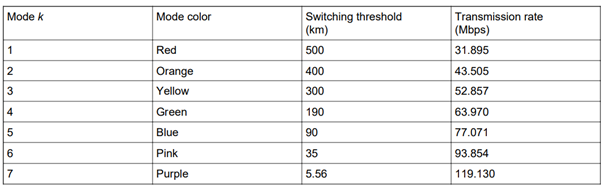

In [234]:
def transmission_rate(source = 'AA101',algorithm = 'bellman',target = 'LHR'):
    distances = []
    plane_1 = 0
    plane_2 = 1
    if algorithm == 'bellman':
        planes = bellman_ford(source,flights = True)
    if algorithm == 'dijkstra':
        result = Graph(plane_distances.keys(), plane_distances)
        previous_nodes, node_cost = dijkstra_algorithm(graph=result, start_node=source)
        planes = print_result(previous_nodes, node_cost, start_node = source, target_node = target, path_info = True)
    while plane_2 != len(planes):
        length = calculate_distance(planes[plane_1],planes[plane_2])
        distances.append(length)
        plane_1 += 1
        plane_2 += 1

    max_distance = round(max(distances))
    
    if max_distance <= 36:
        rate = 119.130
    elif max_distance < 90 and max_distance >36:
        rate = 93.854
    elif max_distance < 190 and max_distance >90:
        rate = 77.071
    elif max_distance < 300 and max_distance >190:
        rate = 63.970
    elif max_distance < 400 and max_distance >300:
        rate = 52.857
    elif max_distance < 500 and max_distance >400:
        rate = 43.505
    elif max_distance < 740 and max_distance >500:
        rate = 31.895
    else:
        rate = 'unavailable'
    print(f'The maximum distance between two planes is {max_distance}, therefore the rate is {rate} (Mbps), using the {algorithm} algorithm')

transmission_rate(algorithm = 'dijkstra')

The maximum distance between two planes is 294, therefore the rate is 63.97 (Mbps), using the dijkstra algorithm


Looking at the figure below, we see the different planes across the North Atlantic

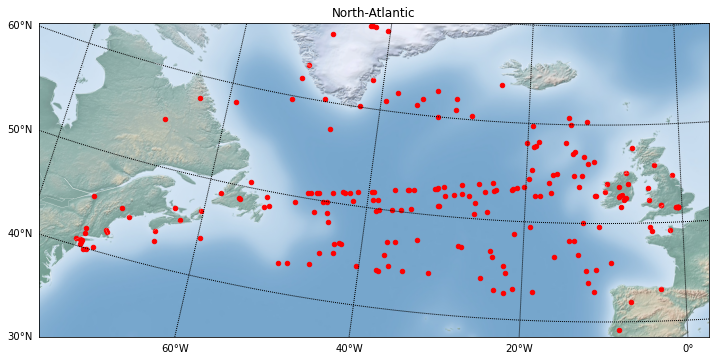

In [235]:
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
m = Basemap(projection='eqdc',  # Equidistant Conic Projection 
            llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon,
            lat_1=10,lat_2=20,lat_0=50,lon_0=-10
           )
# More projection methods can be see from https://matplotlib.org/basemap/users/mapsetup.html# 

m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
m.shadedrelief(scale=0.5)
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)


# Set airport locations
LHR = [51.47, -0.45, 24.91]   # (Latitude, Longitude, Altitude)
EWR = [40.69, -74.17, 2.66]   # (Latitude, Longitude, Altitude)
latitudes = [LHR[0],EWR[0]]
longitudes = [LHR[1],EWR[1]]
altitudes = [LHR[2],EWR[2]]
lats_with_head = LatitudeData
lons_with_head = LongitudeData

lats = LatitudeData
lons = LongitudeData
# compute n# make up some data for scatter plot
x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 20, marker='o', color='Red') 
text_airport_LHR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_EWR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
#text_airport_LHR.set_position([x[0]*1.01, y[0]*1.01])
#text_airport_EWR.set_position([x[1]*1.02, y[1]*1.02])
#text_airport_LHR.set_text('LHR')
#text_airport_EWR.set_text('EWR')


plt.title("North-Atlantic")
plt.show()



Now using the similar results from the Dijkstra and the Bellman-ford algorithms, the planes are shown below.

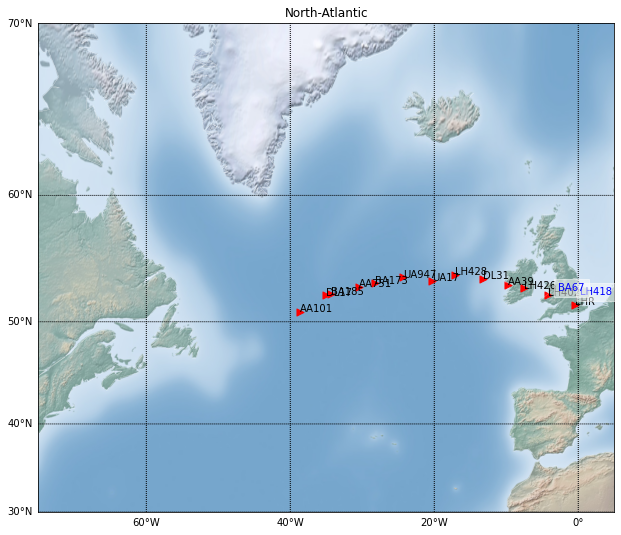

In [236]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
m = Basemap(projection='merc', # Mercator Projection
            llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon)
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
m.shadedrelief(scale=0.5)
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)


points = print_result(previous_nodes, node_cost, start_node="AA101", target_node="LHR", path_info = True)
Latitudes = []
Longitudes = []
Altitudes = []
for vertices in points:
    vertice_location = flight_data.loc[(flight_data["Flight No."] == vertices)]
    Latitudes.append(vertice_location.iloc[0]['Latitude'])
    Longitudes.append(vertice_location.iloc[0]['Longitude'])
    Altitudes.append(vertice_location.iloc[0]['Altitude'])


lats = Latitudes
lons = Longitudes
# compute n# make up some data for scatter plot
x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 50, marker='>', color='Red') 
for i in range(len(points)):
    plt.text(x[i],y[i],points[i])
text_airport_LHR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_EWR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_LHR.set_position([x[0]*1.01, y[0]*1.05])
text_airport_EWR.set_position([x[1]*1.02, y[1]*1.02])
text_airport_LHR.set_text(aircraft_1['flight_no_1'])
text_airport_EWR.set_text(aircraft_2['flight_no_2'])
#text_airport_LHR.set_text('AA101')
#text_airport_EWR.set_text('AA109')


plt.title("North-Atlantic")
plt.show()

Therefore if a connection of 60 Mbps is to be acheived, more planes would likely have to get invoved in the connections. But this is only a good scenario when considering the end to end transmission rate. Now if another objective is brought to the scene, then there are more considerations that are taken into account.

# CONCLUSION

The Single shortest paths can be solved using Dijkstra's algorithm and Bellman-Ford, with Dijkstra beiong faster due to its big O notation and inability to optimize problems with negative paths.